In [12]:
from scipy import stats

In [13]:
z_scores = np.abs(stats.zscore(df))

In [14]:
pd.DataFrame(z_scores, columns=['LotArea Z-Score', 
                                '1stFlrSF Z-Score']
            ).head()

,LotArea Z-Score,1stFlrSF Z-Score
0,0.207142,0.793434
1,0.091886,0.257140
2,0.073480,0.627826
3,0.096897,0.521734
4,0.375148,0.045611


In [15]:
THRESHOLD = 3
row_inds, col_inds = np.where(z_scores > THRESHOLD)

In [16]:
pd.DataFrame({'Outlier Row Index' : row_inds, 
              'Outlier Column Index' : col_inds}
            ).head()

,Outlier Row Index,Outlier Column Index
0,53,0
1,224,1
2,249,0
3,313,0
4,335,0


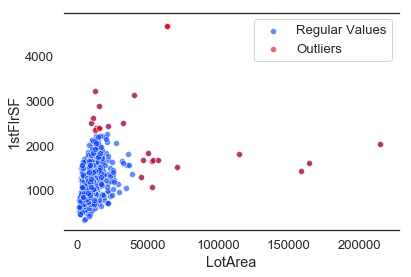

In [17]:
sns.scatterplot(x=df['LotArea'], 
                y=df['1stFlrSF'], 
                color='b', alpha=0.6, label='Regular Values');

sns.scatterplot(x=df.loc[row_inds, 'LotArea'], 
                y=df.loc[row_inds, '1stFlrSF'], 
                color='r', alpha=0.6, label='Outliers');

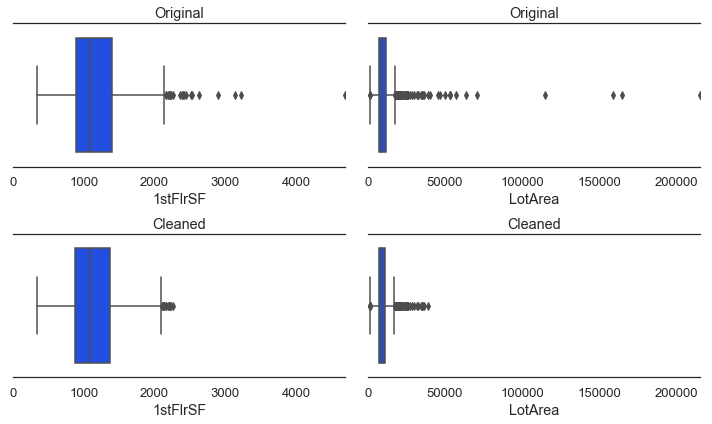

In [18]:
f, axes = plt.subplots(2, 2, figsize=(10, 6))

sns.boxplot(df['1stFlrSF'], ax=axes[0,0])
sns.boxplot(df['LotArea'], ax=axes[0,1])
sns.boxplot(df.drop(row_inds)['1stFlrSF'], ax=axes[1,0])
sns.boxplot(df.drop(row_inds)['LotArea'], ax=axes[1,1])

axes[0,0].set(xlim=(0, df['1stFlrSF'].max()), title='Original')
axes[0,1].set(xlim=(0, df['LotArea'].max()), title='Original')
axes[1,0].set(xlim=(0, df['1stFlrSF'].max()), title='Cleaned')
axes[1,1].set(xlim=(0, df['LotArea'].max()), title='Cleaned')

plt.tight_layout()